In [1]:
# Install required library

!pip install sentence_transformers -q

In [2]:
import re
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt

In [7]:
import json

In [3]:
null = None

In [10]:
# # Job description for matching
# job_description = """Looking for a candidate with expertise in Python, Machine Learning, NLP, and SQL. 
# Must have experience in building predictive models and working with large datasets."""

In [61]:
# Job description for matching  
job_description = """Looking for a Machine Learning Engineer or Data Scientist with 3+ years of experience.  
Must have strong skills in Python (Scikit-learn, TensorFlow, PyTorch), SQL (Spark/Hadoop/ETL), and cloud platforms (AWS/GCP/Azure).  
Experience in NLP, LLMs, GenAI, statistical analysis, and data visualization (Tableau/Power BI) is preferred.  
Remote or based in Mumbai, Bangalore, or Pune."""  

In [38]:
with open('/kaggle/input/rerank-json-paresd/resume_data_pdf5.json', 'r') as json_file:
    resume_data = json.load(json_file)

# If the resume ranker expects a list of dictionaries, wrap the dictionary in a list
resume_data_list = [resume_data]

In [39]:
resume_data_list

[{'contactInformation': {'name': 'Aaditya Vijay Hirurkar',
   'email': None,
   'phoneNumber': None,
   'websitePortfolioLinkedIn': None,
   'githubProfile': None},
  'education': {'institutionName': 'University of Mumbai',
   'degree': 'Bachelor of Engineering, Information Technology',
   'graduationDate': '2008'},
  'experience': [{'jobTitle': 'Business Analyst Sr. Technical Business Analyst',
    'companyName': 'Company Name',
    'location': None,
    'datesOfEmployment': 'Jul 2011 to Dec 2013',
    'description': 'Requirement Gathering, Requirement Analysis, Release management, Product management, Product implementation role, BRS analysis, Feasibility analysis, Vender management, Client handling, Product Management'},
   {'jobTitle': 'Software Implementation Engineer',
    'companyName': 'Base Information Management Pvt. Ltd.',
    'location': None,
    'datesOfEmployment': 'Dec 2008 to Jul 2011',
    'description': 'To communicate directly with the client and gather details of re

In [71]:
resumes = [{"Name": 'Steve SunA', 'Email': 'stevesun1245@gmail.com', 'Skills': ['Python', 'Data Analysis', 'Machine Learning', 'Communication', 'Deep Learning', 'SQL', 'AI', 'Data Visualization', 'Statistical Analysis', 'Big Data', 'Critical Thinking', 'Storytelling'], 'Education': {'University': ['EDUCATION\nSkyline University'], 'Degree': ['Master of Science in Data Science'], 'GPA': ['3.81 GPA'], 'Start Date': ['August 2018'], 'End Date': ['May 2020']}, 'Experience': {'work': ['DataNova Insights\nData Scientist March 2021 – Present\n• Developed and deployed machine learning models to optimize customer retention, increasing\nengagement by 15%.\n• Conducted exploratory data analysis (EDA) and statistical testing to derive actionable business\ninsights.\n• Built scalable ETL pipelines to process large datasets using Python and SQL.\n• Collaborated with cross-functional teams to improve decision-making through predictive analytics.\nNeural Sphere Labs\nData Scientist June 2019 – December 2023\n• Designed and implemented deep learning models for image classification, improving accuracy by\n20%.\n• Automated data preprocessing and feature engineering workflows using Python and Pandas.\n• Created interactive dashboards in Power BI to visualize key performance indicators (KPIs).\n• Partnered with engineers to deploy ML models into production, ensuring seamless integration.']}}
    
    ,
{
  "Contact Information": {
    "Name": "Steve Sun",
    "Email": "stevesun1245@gmail.com",
    "Phone Number": "(123)456789",
    "Website/Portfolio/LinkedIn": "linkedin.com/in/stevesun",
    "Github Profile": null
  },
  "Education": [
    {
      "Institution Name": "Skyline University",
      "Degree": "Master of Science in Data Science",
      "Graduation Date": "May 2020",
      "GPA": "3.81"
    }
  ],
  "Experience": [
    {
      "Job Title": "Data Scientist",
      "Company Name": "DataNova Insights",
      "Location": "Hyderabad",
      "Dates of Employment": "March 2021 - Present",
      "Description": "Developed and deployed machine learning models to optimize customer retention, increasing engagement by 15%. Conducted exploratory data analysis (EDA) and statistical testing to derive actionable business insights. Built scalable ETL pipelines to process large datasets using Python and SQL. Collaborated with cross-functional teams to improve decision-making through predictive analytics."
    },
    {
      "Job Title": "Data Scientist",
      "Company Name": "Neural Sphere Labs",
      "Location": null,
      "Dates of Employment": "June 2019 - December 2023",
      "Description": "Designed and implemented deep learning models for image classification, improving accuracy by 20%. Automated data preprocessing and feature engineering workflows using Python and Pandas. Created interactive dashboards in Power BI to visualize key performance indicators (KPIs). Partnered with engineers to deploy ML models into production, ensuring seamless integration."
    }
  ],
  "Skills": [
    "Python",
    "SQL",
    "Machine Learning",
    "AI",
    "Data Visualization",
    "Statistical Analysis",
    "Big Data",
    "Cloud Technologies",
    "Problem-Solving",
    "Critical Thinking",
    "Communication",
    "Storytelling"
  ]
},
  {'Contact Information': {'Name': 'pdf1',
   'Email': None,
   'Phone Number': None,
   'Website/Portfolio/LinkedIn': None,
   'Github Profile': None},
  'Education': [{'Institution Name': 'Binghamton University, State University of New York',
    'Degree': 'Masters of Science : Industrial and Systems Engineering',
    'Graduation Date': 'Aug 2016',
    'GPA': '3.51/4.00'},
   {'Institution Name': 'Osmania University',
    'Degree': 'Bachelors of Engineering : Mechanical Engineering',
    'Graduation Date': 'May 2014',
    'GPA': '3.33/4.00'}],
  'Experience': [{'Job Title': 'Data Analyst',
    'Company Name': 'Company Name',
    'Location': 'State',
    'Dates of Employment': '07/2016 to Current',
    'Description': 'Data Analyst'},
   {'Job Title': 'Student Manager',
    'Company Name': 'Company Name',
    'Location': 'State',
    'Dates of Employment': '09/2015 to 05/2016',
    'Description': 'Undertook a leadership and advisory role in training newcomers to hone their culinary and behavioral skills.'},
   {'Job Title': 'Intern',
    'Company Name': 'Company Name',
    'Location': None,
    'Dates of Employment': '06/2013 to 07/2013',
    'Description': 'Identified the areas in the assembly line of a light commercial vehicle where more operations could be housed. Developed a detailed model of improved layout to accommodate more operations using AutoCAD to improve the space utilization by 300%.'},
   {'Job Title': 'Consultant',
    'Company Name': None,
    'Location': None,
    'Dates of Employment': None,
    'Description': "Consultant for a self-storage company to classify the customers as 'worthy' and 'not worthy' based on their activity on the company website using the Random Forest algorithm."}],
  'Skills': ['Apache',
   'AutoCAD',
   'charts',
   'Credit',
   'clients',
   'Data Analysis',
   'Data Visualization',
   'Databases',
   'Dec',
   'decision-making',
   'layout',
   'leadership',
   'MATLAB',
   'Microsoft Access',
   'MS Excel',
   'Minitab',
   'MySQL',
   'Optimization',
   'Oracle Database',
   'Python',
   'SAS',
   'Simulation',
   'Six Sigma',
   'SPSS',
   'SQL',
   'Statistical Analysis',
   'Tableau',
   'Visio',
   'website',
   'R',
   'Base SAS',
   'Numpy',
   'Pandas',
   'Matplotlib',
   'Scikit-learn',
   'SPSS',
   'Minitab',
   'MATLAB',
   'Apache Spark',
   'SQL',
   'MS Excel',
   'MS Visio',
   'Tableau',
   'MySQL',
   'Oracle Database',
   'Microsoft Access']}
    ,
    
    {'contactInformation': {'name': 'Sagun Pandeypdf2',
   'email': None,
   'phoneNumber': None,
   'website': 'www.sagunpandey.com',
   'linkedin': 'www.linkedin.com/in/sagunpandey',
   'github': 'www.github.com/sagunpandey'},
  'education': [{'institutionName': 'Lamar University',
    'degree': 'Master of Science : Computer Science',
    'graduationDate': '2017'},
   {'institutionName': 'Tribhuvan University',
    'degree': 'Bachelor of Engineering : Electronics and Communication Engineering',
    'graduationDate': '2013'}],
  'experience': [{'jobTitle': 'Information Technology Intern (Test Automation Engineer)',
    'companyName': 'Company Name',
    'location': 'City, State',
    'datesOfEmployment': '05/2017 to 08/2017',
    'description': "Created nicely baked ‘Test Automation Framework' to provide an execution environment for the automation test scripts."},
   {'jobTitle': 'Java Full Stack Developer',
    'companyName': 'Company Name',
    'location': 'City, State',
    'datesOfEmployment': '05/2014 to 06/2016',
    'description': 'Worked on varied aspects of application development including requirement analysis, design, implementation, and testing.'},
   {'jobTitle': 'Java Developer Intern',
    'companyName': 'Company Name',
    'location': 'City, State',
    'datesOfEmployment': '03/2014 to 05/2014',
    'description': 'Core Java programming with Multithreading Exception Handling, File Handling, IO, Generics, and Java Collections.'},
   {'jobTitle': 'Software Developer Intern',
    'companyName': 'Company Name',
    'location': 'City, State',
    'datesOfEmployment': '01/2013 to 10/2013',
    'description': 'Designed and developed applications using Scrum, an iterative and incremental Agile Software Development methodology.'}],
  'skills': ['Java/J2EE',
   'JavaScript',
   'Android',
   'HTML',
   'CSS',
   'SQL',
   'C',
   'C',
   'Spring',
   'Restful-Web Services',
   'Hibernate',
   'AngularJS',
   'ReactJS',
   'jQuery',
   'Bootstrap',
   'Selenium WebDriver',
   'Cucumber',
   'MySQL',
   'PostgreSQL',
   'Oracle',
   'MongoDB',
   'Gradle',
   'Maven',
   'Ant',
   'Agile/Scrum',
   'Waterfall',
   'TDD',
   'Clean Coding',
   'Continuous Delivery',
   'Microservices',
   'Single Page Application',
   'REST',
   'Client/Server',
   'SVN',
   'Git',
   'AWS',
   'Bower',
   'Grunt',
   'Npm',
   'Node',
   'JSON',
   'XML',
   'Jenkins',
   'Eclipse',
   'IntelliJ',
   'Android Studio',
   'Linux',
   'Windows']}
             ,
    {'Contact Information': {'Name': 'pdf3',
   'Email': None,
   'Phone Number': None,
   'Website/Portfolio/LinkedIn': None,
   'Github Profile': None},
  'Education': [{'Institution Name': 'University of Pennsylvania, School of Eng. and Applied Science',
    'Degree': 'Master of Science : Mech. Eng. & Applied Mechanics',
    'Graduation Date': 'Jun'},
   {'Institution Name': 'Harbin Institute of Technology (HIT)',
    'Degree': 'Bachelor of Science : Mechanical Design and Automation',
    'Graduation Date': 'SepAug'}],
  'Experience': [{'Job Title': 'R&D Product Development Engineer',
    'Company Name': 'Company Name',
    'Location': 'City',
    'Dates of Employment': 'June 2016 to Current',
    'Description': 'Design and build a tail-sitter VTOL(vertical take off and landing) UAV(unmanned aerial vehicle) which takes off and lands vertically and travels horizontally. Main duties include but not limit to aerodynamics modeling, UAV control system design, mechanical manufacturing, simulation and tuning/experiments.'},
   {'Job Title': 'Research assistant',
    'Company Name': 'Company Name',
    'Location': 'City',
    'Dates of Employment': 'May 2015 to February 2016',
    'Description': 'Research assistant for Wharton School environment economics projects on Europe Emission Trading System (EU ETC). Main duties include large scale data collecting, cleaning, merging, database construction and data analysis, etc.'},
   {'Job Title': 'Mechanical Technician',
    'Company Name': 'Company Name',
    'Location': 'City',
    'Dates of Employment': 'August 2013 to September 2013',
    'Description': 'Check, report on reducer components, automobile chassis producing, processing and assembly line. Trained in mechanical manufacturing fundamentals in industrial production of automobiles.'}],
  'Skills': ['3D',
   'assembly language',
   'AutoCAD',
   'automobiles',
   'C',
   'C language',
   'CAD',
   'Chinese',
   'Clustering',
   'com',
   'controller',
   'data analysis',
   'Database',
   'database software',
   'designing',
   'economics',
   'Editing',
   'embedded system',
   'English',
   'Experiments',
   'GUI',
   'graphic',
   'Java',
   'Laser',
   'Lathe',
   'Machine Learning',
   'MATLAB',
   'Mechanical',
   'Mechanical Design',
   'Mechanical Engineering',
   'Excel',
   'Windows 7',
   'Word',
   'Mill',
   'Modeling',
   'Networks',
   'Neural',
   'Operating Systems',
   'OS',
   'painting',
   'camera',
   'PLC',
   'predict',
   'producing',
   'Programming',
   'Python',
   'Rendering',
   'Research',
   'Robotics',
   'Simulation',
   'Solidworks',
   'SPSS',
   'SQL',
   'SQL Server',
   'STATA',
   'Statistics',
   'system design',
   'Trading System',
   'vision']},
           
    {'contactInformation': {'name': 'Chu-Hsiang Wupdf4',
   'email': None,
   'phoneNumber': None,
   'website/portfolio/linkedIn': None,
   'githubProfile': None},
  'education': [{'institutionName': 'UT Austin',
    'degree': 'Ph.D',
    'graduationDate': 'May 2018',
    'fieldOfStudy': 'PETROLEUM ENGINEERING Scientific Computation'},
   {'institutionName': 'National Taiwan University',
    'degree': 'M.S',
    'graduationDate': 'Jun. 2010',
    'fieldOfStudy': 'MECHANICAL ENGINEERING'},
   {'institutionName': 'National Tsing Hua University',
    'degree': 'B.S',
    'graduationDate': 'Jun. 2008',
    'fieldOfStudy': 'POWER MECHANICAL ENGINEERING'}],
  'experience': [{'jobTitle': 'ENGINEERING INTERN',
    'companyName': 'Company Name',
    'location': 'State',
    'datesOfEmployment': '08/2016 - 12/2016',
    'description': 'Develop a cavings transport model for optimizing hole-cleaning operations. Developed a solids transport model for predicting cuttings/cavings bed height during a hole-cleaning operation.'},
   {'jobTitle': 'ENGINEERING INTERN',
    'companyName': None,
    'location': 'City, State',
    'datesOfEmployment': '05/2016 - 08/2016',
    'description': 'Optimize diverter pumping schedule for better production performance after well re-stimulation. Built a simulator to model proppant, diverter, and slurry distribution in a plug-and-perf hydraulic fracturing operation.'},
   {'jobTitle': 'PROCESS ENGINEER',
    'companyName': 'Company Name',
    'location': 'City',
    'datesOfEmployment': '04/2012 - 05/2013',
    'description': 'Improve display yield through statistical modeling, process control, and tool modifications. Won Qualstar award in Nov. 2012 by completing two specific yield improvement tasks in merely two months.'}],
  'skills': ['C++',
   'Python',
   'MATLAB',
   'Git',
   'Bash',
   'R',
   'SQL',
   'Machine Learning',
   'Linux',
   'Unix',
   'High performance computing clusters',
   'Scikit-learn',
   'Pandas',
   'Seaborn',
   'matplotlib',
   'TensorFlow',
   'CFD-DEM',
   'OpenFOAM',
   'CFD-ACE+',
   'Fluent',
   'COMSOL',
   'LAMMPS',
   'LIGGGHTS',
   'CMG',
   'FracPro',
   'Saphir',
   'SEM',
   'AFM',
   'Confocal Microscopy',
   'Regression analysis',
   'Statistical process control',
   'Design of experiments']},
    {'contactInformation': {'name': 'Aaditya Vijay Hirurkarpdf5',
   'email': None,
   'phoneNumber': None,
   'websitePortfolioLinkedIn': None,
   'githubProfile': None},
  'education': {'institutionName': 'University of Mumbai',
   'degree': 'Bachelor of Engineering, Information Technology',
   'graduationDate': '2008'},
  'experience': [{'jobTitle': 'Business Analyst Sr. Technical Business Analyst',
    'companyName': 'Company Name',
    'location': None,
    'datesOfEmployment': 'Jul 2011 to Dec 2013',
    'description': 'Requirement Gathering, Requirement Analysis, Release management, Product management, Product implementation role, BRS analysis, Feasibility analysis, Vender management, Client handling, Product Management'},
   {'jobTitle': 'Software Implementation Engineer',
    'companyName': 'Base Information Management Pvt. Ltd.',
    'location': None,
    'datesOfEmployment': 'Dec 2008 to Jul 2011',
    'description': 'To communicate directly with the client and gather details of requirement, Documentation (URS,SRS), Designing screen layouts, Interact with development team, QC team for effective solution'}],
  'skills': ['C',
   'C++',
   'Core Java',
   'Oracle 9i',
   'MS SQL Server-2005',
   'IBM DB2',
   'UML',
   'HTML',
   'XML',
   'Windows 9X/XP/2000/2003 Server',
   'Linux Red hat 5',
   'SUSE 11',
   'Rational Rose',
   'MS Visio',
   'MS Project',
   'Oracle SQL Developer',
   'Crystal Reports',
   'Java Workflow Editor',
   'Eclipse',
   'Jboss',
   'Tomcat5',
   'IBM Websphere App Server 7']} ]
           

In [14]:
# Function Definitions

def normalize_text(data):
    """
    Recursively extract and combine text from nested dictionaries and lists.
    """
    if isinstance(data, str):
        return data
    elif isinstance(data, list):
        return " ".join(normalize_text(item) for item in data)
    elif isinstance(data, dict):
        return " ".join(normalize_text(value) for value in data.values())
    else:
        return str(data)

def match_resume_to_job(resume_text, job_description, model):
    """
    Compute similarity between resume text and job description using a sentence-transformer model.
    """
    embeddings = model.encode([resume_text, job_description], convert_to_tensor=True)
    similarity = util.cos_sim(embeddings[0], embeddings[1])
    return similarity.item()

def compute_skill_match(skills, job_description):
    """
    Compute the percentage of skills that match the job description.
    """
    matched_skills = [skill for skill in skills if skill.lower() in job_description.lower()]
    return len(matched_skills) / len(skills) if skills else 0

In [56]:
def rank_candidates(resumes, job_description, model):
    """
    Rank candidates based on similarity scores for skills, education, and experience.
    """
    scores = []

    for resume in resumes:
        skills_text = normalize_text(resume.get("Skills", []))
        print(skills_text)
        experience_text = normalize_text(resume.get("Experience", {}))
        print(experience_text)
        education_text = normalize_text(resume.get("Education", {}))


        # Compute similarity scores
        skill_score = match_resume_to_job(skills_text, job_description, model)
        print(skill_score)
        experience_score = match_resume_to_job(experience_text, job_description, model)
        education_score = match_resume_to_job(education_text, job_description, model)
        keyword_match_score = compute_skill_match(resume.get("Skills", []), job_description)

        # Weighted total score
        total_score = 0.5 * skill_score + 0.4 * experience_score + 0.1 * education_score + 0.1 * keyword_match_score

        # Collect scores
        scores.append({
                    "Name": (
                        resume.get("Name")  # First try top-level "Name"
                        or resume.get("contactInformation", {}).get("name")  # Try lowercase format
                        or resume.get("Contact Information", {}).get("Name")  # Try title case format
                        or "Unknown Candidate"  # Fallback if no name found
                    ),
                    "Skill Score": skill_score,
                    "Experience Score": experience_score,
                    "Education Score": education_score,
                    "Keyword Match Score": keyword_match_score,
                    "Total Score": total_score
            })

    return sorted(scores, key=lambda x: x["Total Score"], reverse=True)

In [57]:

def plot_scores(ranked_candidates):
    """
    Visualize the scores of candidates using a bar chart.
    """
    names = [candidate['Name'] for candidate in ranked_candidates]
    skill_scores = [candidate['Skill Score'] for candidate in ranked_candidates]
    experience_scores = [candidate['Experience Score'] for candidate in ranked_candidates]
    education_scores = [candidate['Education Score'] for candidate in ranked_candidates]
    keyword_match_scores = [candidate['Keyword Match Score'] for candidate in ranked_candidates]

    # Plot setup
    bar_width = 0.2
    index = range(len(names))

    # Create bars for each category
    plt.bar(index, skill_scores, bar_width, label="Skills")
    plt.bar([i + bar_width for i in index], experience_scores, bar_width, label="Experience")
    plt.bar([i + 2 * bar_width for i in index], education_scores, bar_width, label="Education")
    plt.bar([i + 3 * bar_width for i in index], keyword_match_scores, bar_width, label="Keyword Match")

    # Configure plot details
    plt.xticks([i + 1.5 * bar_width for i in index], names)
    plt.xlabel("Candidates")
    plt.ylabel("Scores")
    plt.title("Candidate Comparison")
    plt.legend()

    # Show plot
    plt.tight_layout()
    plt.show()

In [63]:
# Load SentenceTransformer model
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

In [72]:
# Rank candidates
ranked_candidates = rank_candidates(resumes, job_description, model)

Python Data Analysis Machine Learning Communication Deep Learning SQL AI Data Visualization Statistical Analysis Big Data Critical Thinking Storytelling
DataNova Insights
Data Scientist March 2021 – Present
• Developed and deployed machine learning models to optimize customer retention, increasing
engagement by 15%.
• Conducted exploratory data analysis (EDA) and statistical testing to derive actionable business
insights.
• Built scalable ETL pipelines to process large datasets using Python and SQL.
• Collaborated with cross-functional teams to improve decision-making through predictive analytics.
Neural Sphere Labs
Data Scientist June 2019 – December 2023
• Designed and implemented deep learning models for image classification, improving accuracy by
20%.
• Automated data preprocessing and feature engineering workflows using Python and Pandas.
• Created interactive dashboards in Power BI to visualize key performance indicators (KPIs).
• Partnered with engineers to deploy ML models into

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.40061670541763306


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Python SQL Machine Learning AI Data Visualization Statistical Analysis Big Data Cloud Technologies Problem-Solving Critical Thinking Communication Storytelling
Data Scientist DataNova Insights Hyderabad March 2021 - Present Developed and deployed machine learning models to optimize customer retention, increasing engagement by 15%. Conducted exploratory data analysis (EDA) and statistical testing to derive actionable business insights. Built scalable ETL pipelines to process large datasets using Python and SQL. Collaborated with cross-functional teams to improve decision-making through predictive analytics. Data Scientist Neural Sphere Labs None June 2019 - December 2023 Designed and implemented deep learning models for image classification, improving accuracy by 20%. Automated data preprocessing and feature engineering workflows using Python and Pandas. Created interactive dashboards in Power BI to visualize key performance indicators (KPIs). Partnered with engineers to deploy ML model

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.41048598289489746


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Apache AutoCAD charts Credit clients Data Analysis Data Visualization Databases Dec decision-making layout leadership MATLAB Microsoft Access MS Excel Minitab MySQL Optimization Oracle Database Python SAS Simulation Six Sigma SPSS SQL Statistical Analysis Tableau Visio website R Base SAS Numpy Pandas Matplotlib Scikit-learn SPSS Minitab MATLAB Apache Spark SQL MS Excel MS Visio Tableau MySQL Oracle Database Microsoft Access
Data Analyst Company Name State 07/2016 to Current Data Analyst Student Manager Company Name State 09/2015 to 05/2016 Undertook a leadership and advisory role in training newcomers to hone their culinary and behavioral skills. Intern Company Name None 06/2013 to 07/2013 Identified the areas in the assembly line of a light commercial vehicle where more operations could be housed. Developed a detailed model of improved layout to accommodate more operations using AutoCAD to improve the space utilization by 300%. Consultant None None None Consultant for a self-storage c

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.3556215763092041


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

-0.07479621469974518


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

3D assembly language AutoCAD automobiles C C language CAD Chinese Clustering com controller data analysis Database database software designing economics Editing embedded system English Experiments GUI graphic Java Laser Lathe Machine Learning MATLAB Mechanical Mechanical Design Mechanical Engineering Excel Windows 7 Word Mill Modeling Networks Neural Operating Systems OS painting camera PLC predict producing Programming Python Rendering Research Robotics Simulation Solidworks SPSS SQL SQL Server STATA Statistics system design Trading System vision
R&D Product Development Engineer Company Name City June 2016 to Current Design and build a tail-sitter VTOL(vertical take off and landing) UAV(unmanned aerial vehicle) which takes off and lands vertically and travels horizontally. Main duties include but not limit to aerodynamics modeling, UAV control system design, mechanical manufacturing, simulation and tuning/experiments. Research assistant Company Name City May 2015 to February 2016 Rese

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.3724411129951477


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

-0.07479621469974518


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

-0.07479621469974518


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [73]:
# Display ranked candidates
for candidate in ranked_candidates:
    print(f"Name: {candidate['Name']}, Total Score: {candidate['Total Score']:.2f}")

Name: Steve SunA, Total Score: 0.51
Name: Steve Sun, Total Score: 0.51
Name: pdf1, Total Score: 0.41
Name: pdf3, Total Score: 0.33
Name: Sagun Pandeypdf2, Total Score: -0.07
Name: Chu-Hsiang Wupdf4, Total Score: -0.07
Name: Aaditya Vijay Hirurkarpdf5, Total Score: -0.07


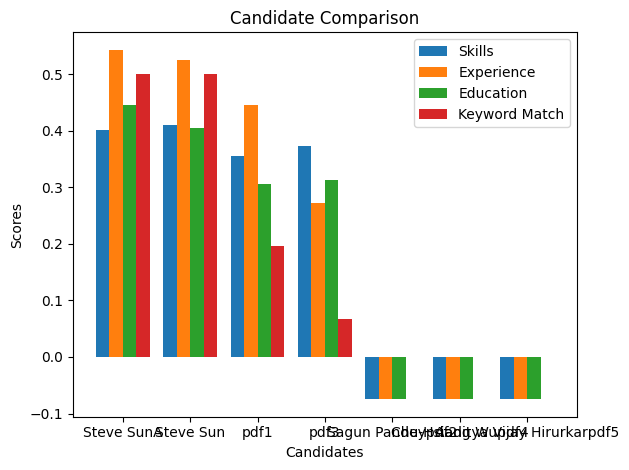

In [74]:
# Plot the scores
plot_scores(ranked_candidates)